In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/istanbul_stock_exchange.csv")
df

,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...,...
531,16-Feb-11,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,17-Feb-11,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,18-Feb-11,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,21-Feb-11,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = df['date'].astype('int64')//10**9
df.drop(columns=['date'], inplace=True)
df

C:\Users\prash\AppData\Local\Temp\ipykernel_3036\1666541646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,timestamp
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,1231113600
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,1231200000
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,1231286400
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,1231372800
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,1231459200
...,...,...,...,...,...,...,...,...,...,...
531,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039,1297814400
532,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039,1297900800
533,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938,1297987200
534,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958,1298246400


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,timestamp
0,0.746889,0.664154,0.404333,0.489969,0.558409,0.451728,0.722875,0.530944,0.776771,0.000000
1,0.668147,0.628741,0.505990,0.546240,0.643736,0.489000,0.618569,0.519229,0.548080,0.001285
2,0.254242,0.314902,0.194024,0.310007,0.248066,0.606576,0.152590,0.273987,0.214765,0.002571
3,0.000000,0.000000,0.470147,0.364884,0.516936,0.093003,0.698163,0.373348,0.221615,0.003856
4,0.549467,0.509203,0.266894,0.291678,0.400483,0.411670,0.374747,0.326501,0.356172,0.005141
...,...,...,...,...,...,...,...,...,...,...
531,0.539854,0.529392,0.493360,0.487558,0.597004,0.502925,0.613904,0.481545,0.481694,0.992288
532,0.545277,0.543299,0.467534,0.459599,0.524650,0.475185,0.472073,0.416335,0.458533,0.993573
533,0.475748,0.448175,0.458172,0.496068,0.514491,0.456817,0.505584,0.426279,0.526836,0.994859
534,0.374650,0.383140,0.273345,0.342305,0.414130,0.463884,0.356235,0.312461,0.435419,0.998715


In [8]:
df_scaled.values[0]

array([0.74688902, 0.66415426, 0.40433279, 0.48996908, 0.55840869,
       0.45172804, 0.72287474, 0.53094438, 0.77677094, 0.        ])

In [11]:
def create_seq(data, seqlen):
    xsequences = []
    ylabels = []
    for i in range(len(data)-seqlen):
        xsequences.append(data[i:i+seqlen])
        ylabels.append(data[i+seqlen])
    return np.array(xsequences), np.array(ylabels)

In [12]:
x,y = create_seq(df_scaled.values, 10)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, shuffle=False)
xtrain.shape

(420, 10, 10)

In [16]:
ytrain.shape

(420, 10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [18]:
def create_model():
    model = Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=(10,10)),
        layers.Dropout(0.2),
        layers.LSTM(32, return_sequences=False),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [20]:
lstm = create_model()
lstm.summary()
hist = lstm.fit(
    xtrain, ytrain,
    epochs=4,
    validation_data=(xtest, ytest),
    batch_size=32,
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 64)              │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 0.1526 - val_loss: 0.0244
Epoch 2/4
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0274 - val_loss: 0.0260
Epoch 3/4
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0217 - val_loss: 0.0246
Epoch 4/4
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0221 - val_loss: 0.0242


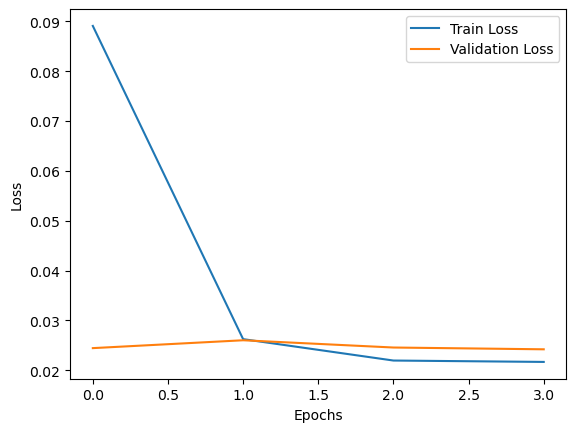

In [23]:
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
ypred_prob = lstm.predict(xtest)
ypred = np.argmax(ypred_prob, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step


In [28]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest, ypred))

ValueError: y_true and y_pred have different number of output (10!=1)

In [29]:
print(ytest[:5])
print(ytest.shape)

[[0.52516498 0.49272235 0.56558918 0.59217167 0.68230411 0.42939347
  0.59611281 0.54659022 0.52490584 0.80077121]
 [0.45471843 0.4588514  0.42155509 0.44366572 0.4766142  0.45172804
  0.39882643 0.39859177 0.45567769 0.80205656]
 [0.51631495 0.51308774 0.40304551 0.37286872 0.47982955 0.41828989
  0.53347403 0.33900117 0.45019202 0.8033419 ]
 [0.44033518 0.41991902 0.37426748 0.43600477 0.51314162 0.3626912
  0.51589392 0.38519974 0.44375385 0.80462725]
 [0.48009577 0.46958275 0.61351892 0.63380422 0.60909472 0.45172804
  0.38353003 0.53878054 0.46245309 0.8059126 ]]
(106, 10)


In [30]:
print("ypred shape:", ypred.shape)  # should be (106, 10)
print("ytest shape:", ytest.shape)

ypred shape: (106,)
ytest shape: (106, 10)
